In [1]:
%cd ..
from src import data_utils, model_utils
from pdpbox import pdp
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd

/Users/samuelberrebi/Desktop/Projects/DsB/Explainability/Interpretable-jimams


/Users/samuelberrebi/anaconda3/envs/x-hec-solution/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Preprocessing

In [2]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()

raw_data = pd.read_csv("data/data_clean.csv")
df_one_hot = data_utils.preprocess_data(raw_data)
X, y = df_one_hot.drop('y', axis=1), df_one_hot['y']
X_train, X_test, y_train, y_test = data_utils.split_data(X, y)

[codecarbon INFO @ 19:01:37] [setup] RAM Tracking...
[codecarbon INFO @ 19:01:37] [setup] GPU Tracking...
[codecarbon INFO @ 19:01:37] No GPU found.
[codecarbon INFO @ 19:01:37] [setup] CPU Tracking...
[codecarbon WARNING @ 19:01:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 19:01:38] We saw that you have a Apple M2 but we don't know it. Please contact us.
[codecarbon INFO @ 19:01:38] CPU Model on constant consumption mode: Apple M2
[codecarbon INFO @ 19:01:38] >>> Tracker's metadata:
[codecarbon INFO @ 19:01:38]   Platform system: macOS-14.0-arm64-arm-64bit
[codecarbon INFO @ 19:01:38]   Python version: 3.10.10
[codecarbon INFO @ 19:01:38]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 19:01:38]   Available RAM : 16.000 GB
[codecarbon INFO @ 19:01:38]   CPU count: 8
[codecarbon INFO @ 19:01:38]   CPU model: Apple M2
[codecarbon INFO @ 19:01:38]   GPU count: None
[codecarbon INFO @ 19:01:38]   GPU model: None


## Loading the model

In [3]:
# Load the model from the .pkl file
xgb_classifier = pickle.load(open("model/model.pkl", "rb"))


## PDP

[codecarbon WARNING @ 19:14:10] Already started tracking


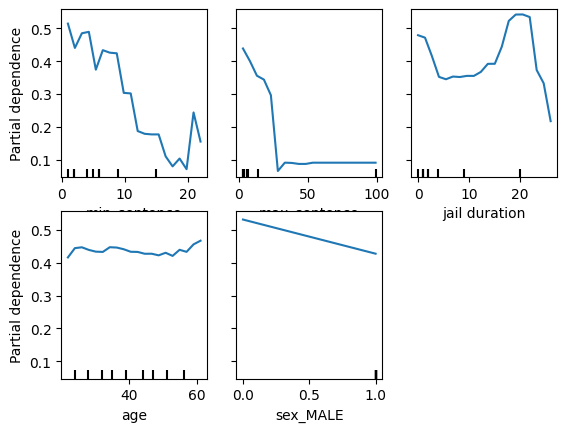

[codecarbon WARNING @ 19:14:13] Tracker already stopped !
[codecarbon WARNING @ 19:14:13] Background scheduler didn't run for a long period (114s), results might be inaccurate
[codecarbon INFO @ 19:14:13] Energy consumed for RAM : 0.001195 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 19:14:13] Energy consumed for all CPUs : 0.008466 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:14:13] 0.009661 kWh of electricity used since the beginning.


0.0006510453249365401


In [20]:
tracker.start()

import pandas as pd
import pickle
from sklearn.inspection import PartialDependenceDisplay

# Assuming X_train is your features dataset
features = ['min_sentence', 'max_sentence', 'jail duration', 'age', "sex_MALE"]
feature_names = list(X_train.columns)
# Use PartialDependenceDisplay.from_estimator to create the PDPs
PartialDependenceDisplay.from_estimator(
    xgb_classifier, X_train, features=features,
    feature_names=feature_names,  # Replace with the actual feature names
    grid_resolution=20  # Controls the number of values to plot on the x-axis
)

# To show the plot if not using an interactive environment like Jupyter Notebook
import matplotlib.pyplot as plt
plt.show()

emissions: float = tracker.stop()
print(emissions)

### PDP RACE

In [ ]:
# Assuming X_train is your features dataset
features = ['race / ethnicity_ASIAN/PACIFIC',
       'race / ethnicity_BLACK', 'race / ethnicity_HISPANIC',
       'race / ethnicity_OTHER', 'race / ethnicity_UNKNOWN',
       'race / ethnicity_WHITE']
feature_names = list(X_train.columns)
# Use PartialDependenceDisplay.from_estimator to create the PDPs
race_pdp = PartialDependenceDisplay.from_estimator(
    xgb_classifier, X_train, features=features,
    feature_names=feature_names,  # Replace with the actual feature names
    grid_resolution=20  # Controls the number of values to plot on the x-axis
)

race_values = []
for i in range(len(features)): 
    race_values.append(race_pdp.pd_results[i].average[0][1])

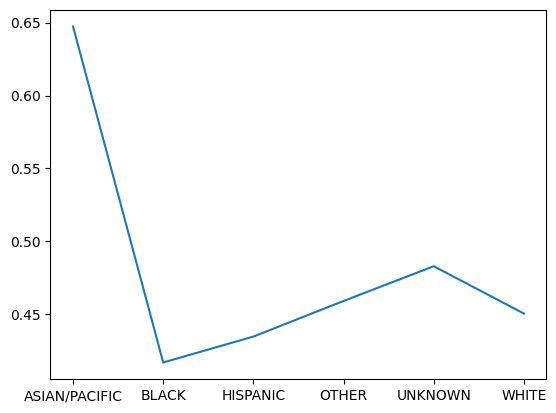

In [50]:
labels = [race[17:] for race in features]
plt.plot(labels, race_values)

### PDP Parole board inrterview type

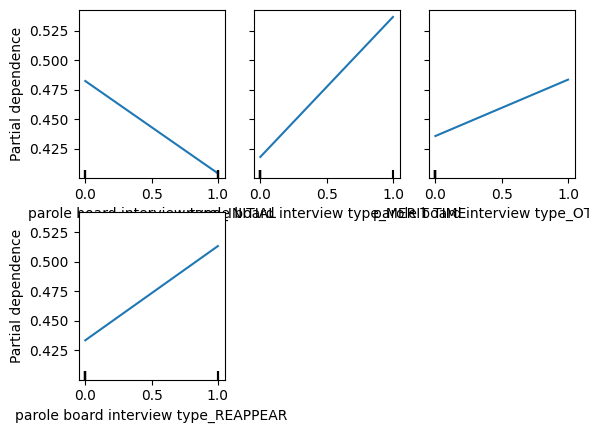

In [56]:
# Assuming X_train is your features dataset
features = ['parole board interview type_INITIAL',
       'parole board interview type_MERIT TIME',
       'parole board interview type_OTHERS',
       'parole board interview type_REAPPEAR']
feature_names = list(X_train.columns)
# Use PartialDependenceDisplay.from_estimator to create the PDPs
race_pdp = PartialDependenceDisplay.from_estimator(
    xgb_classifier, X_train, features=features,
    feature_names=feature_names,  # Replace with the actual feature names
    grid_resolution=20  # Controls the number of values to plot on the x-axis
)

race_values = []
for i in range(len(features)): 
    race_values.append(race_pdp.pd_results[i].average[0][1])



<BarContainer object of 4 artists>

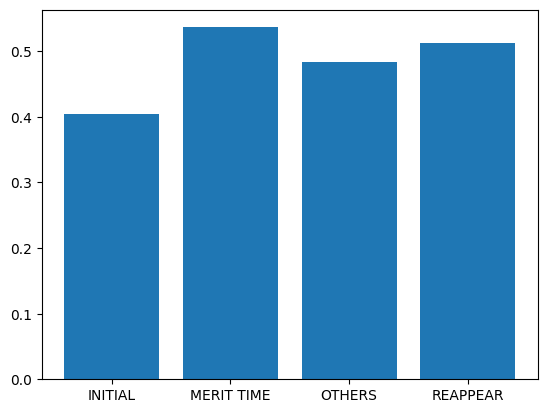

In [58]:
labels = [race[28:] for race in features]
plt.bar(labels, race_values)

## ALE

[codecarbon WARNING @ 19:30:49] Already started tracking
[codecarbon WARNING @ 19:30:50] Tracker already stopped !
[codecarbon WARNING @ 19:30:50] Background scheduler didn't run for a long period (996s), results might be inaccurate
[codecarbon INFO @ 19:30:50] Energy consumed for RAM : 0.002856 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 19:30:50] Energy consumed for all CPUs : 0.020231 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 19:30:50] 0.023087 kWh of electricity used since the beginning.


0.0015558438245304325


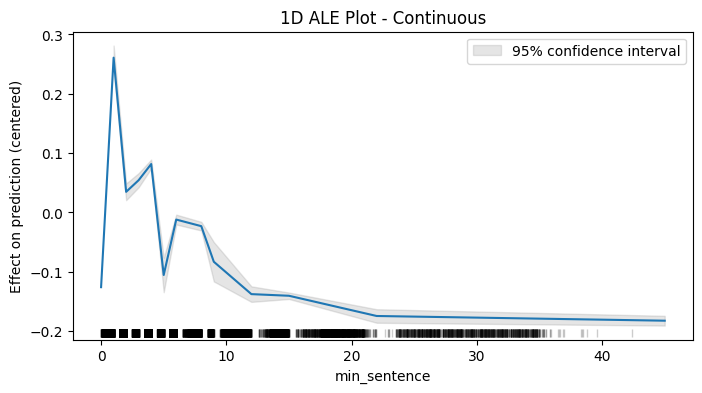

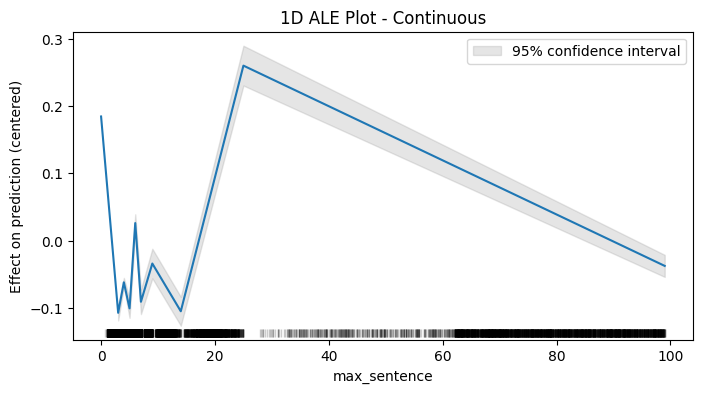

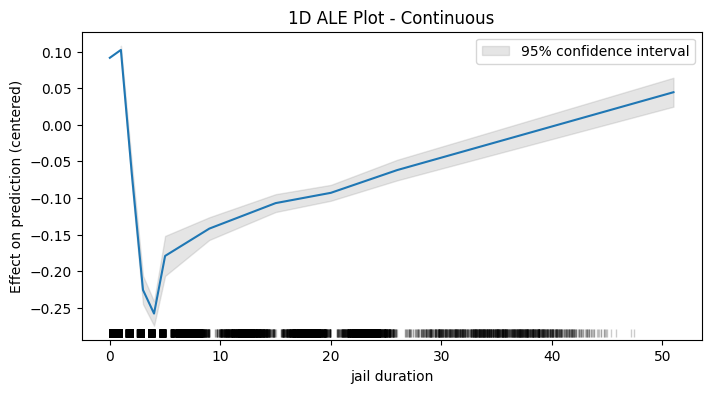

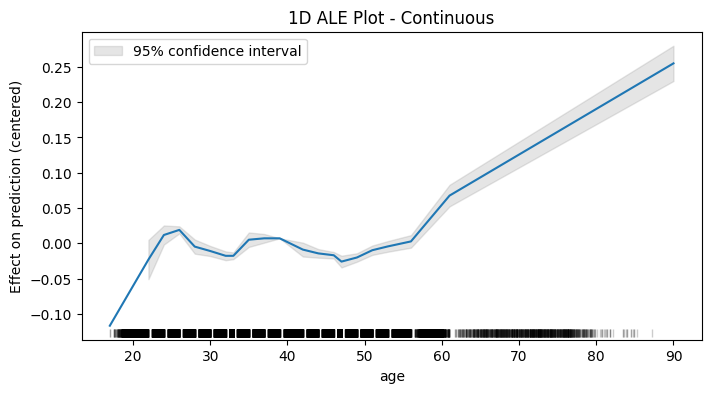

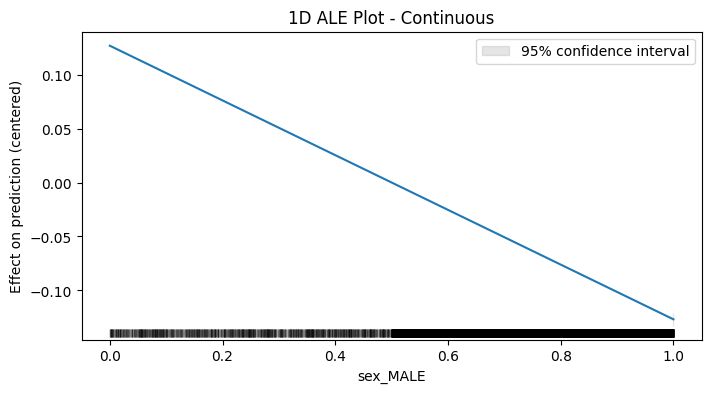

In [59]:

tracker.start()

from PyALE import ale

features = ['min_sentence', 'max_sentence', 'jail duration', 'age', "sex_MALE"]
X_sample = X_train[:1000]
for feature in features :
    ale_contin = ale(
        X=X_train,
        model=xgb_classifier,
        feature=[feature],
        feature_type="continuous",
        grid_size=20,
        include_CI=True,
        C=0.95,
    )
    
emissions: float = tracker.stop()
print(emissions)


### ALE - RACE

In [ ]:
features = ['race / ethnicity_ASIAN/PACIFIC',
       'race / ethnicity_BLACK', 'race / ethnicity_HISPANIC',
       'race / ethnicity_OTHER', 'race / ethnicity_UNKNOWN',
       'race / ethnicity_WHITE']
X_sample = X_train[:1000]
race_values = []
for feature in features :
       ale_contin = ale(
        X=X_train,
        model=xgb_classifier,
        feature=[feature],
        feature_type="continuous",
        grid_size=20,
        include_CI=True,
        C=0.95,)
       race_values.append(ale_contin.eff[1])


<BarContainer object of 6 artists>

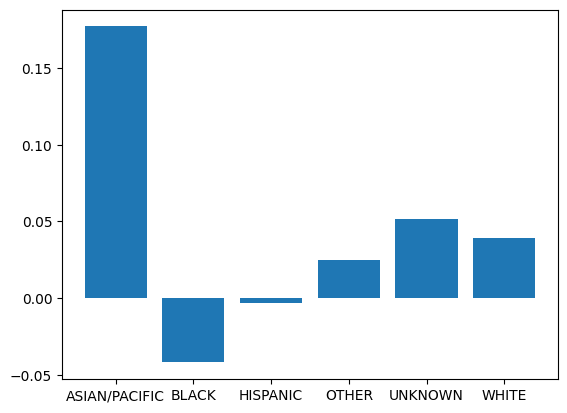

In [70]:
labels = [race[17:] for race in features]
plt.bar(labels, race_values)

### ALE - Parole

In [ ]:
features = ['parole board interview type_INITIAL',
       'parole board interview type_MERIT TIME',
       'parole board interview type_OTHERS',
       'parole board interview type_REAPPEAR']
X_sample = X_train[:1000]
race_values = []
for feature in features :
       ale_contin = ale(
        X=X_train,
        model=xgb_classifier,
        feature=[feature],
        feature_type="continuous",
        grid_size=20,
        include_CI=True,
        C=0.95,)
       race_values.append(ale_contin.eff[1])

<BarContainer object of 4 artists>

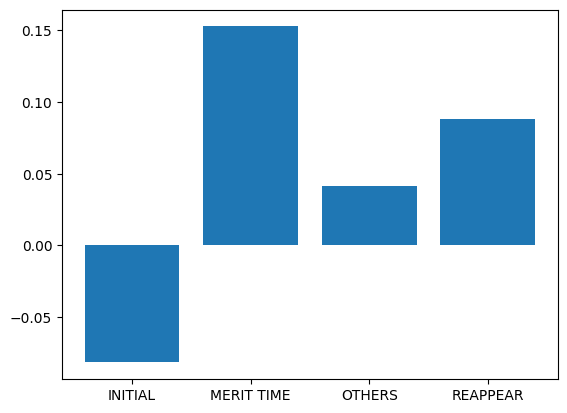

In [72]:
labels = [race[28:] for race in features]
plt.bar(labels, race_values)